## Model on noisy data
Previously, in the notebooks ``pendulum.ipynb`` and ``lorenz_attractor``, we train the model on data generated by existing dynamical system and the model is able to fit the data and recognize each system, which make the model feasible.

For the moment, the model was trained on artificial dataset without any noise. Real dataset contains noise, then it is most of the time impossible to get a 100% accuracy as we get with the data generated by the existing dynamical system.

In this notebook, we generate data from an existing dynamical system and we add noise (gaussian noise) to these data. Then we simulate the model $40$ times by changing some selected feature.

In our case, if $(X_t)$ are the generated data, then we obtain the noisy data $(\tilde{X}_t)$ defined by
$$\tilde{X}_t = X_t +\sigma\epsilon_t,$$
where $(\epsilon_t)$ are standard Gaussian random variables and $\sigma$ is the standard deviation parameter. As mentionned before, we select three different values for the following feature:
 - number of epochs: {200, 500, 1000}
 - batch size: {10, 50, 100}
 - Noise variance: {0, 0.1, 0.2, 0.3, 0.4, 0.5}

For each simulation, we iterate on different of each parameters. We need also accuracies measurement to minimize, theses measurements are
 - Loss function value: $L(W) = ||\hat{y}-y||^2$
 - The tensor norm of the linear part: $||\hat{H}_1 - H_1||_F^2$
 - The tensor norm of the quadratic part: $||\hat{H}_2 - H_2||_F^2$
 
the terms with " ^ " are the fitted values by the models.

In this notebook, we only focus on noisy data generated from the Lorenz attractor.

The code to generate these feature will be provided if requested.

## Noisy Lorenz attractor analysis
We recall that the Lorenz attractor is generated the dynamical system 
\begin{align*}
&\dot{x}(t)= \sigma(y(t)-x(t)),\\
&\dot{y}(t)= x(t)(\rho-z(t))-y(t),\\
&\dot{z}(t)= x(t)y(t) - \beta z(t),
\end{align*}
with initial condition $u(0)=u_0=(x_0, y_0, z_0).$

In [11]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import the generated feeature
path_gen = 'gen_data/'
grid_df_lorenz_1000 = pd.read_csv(path_gen + 'lorenz_df_1000.csv', index_col=0)

In [6]:
grid_df_lorenz_1000.head()

,noise_std,epoch,batch,min_loss,Linear diff,Quadratic diff,Linear,Quadratic
0,0.0,200,10,415.235054,33.025593,0.133424,[[ 0.2660012 0.34516168 0.00481499]\n [ 0.3...,[[[-7.09583797e-03 7.83991534e-03 8.44447222...
1,0.0,200,50,66.232870,32.987263,0.116629,[[ 0.34060892 0.4269496 0.06105396]\n [ 0.3...,[[[-0.00148063 0.00482754 0.00431253]\n [-0...
2,0.0,200,100,41.975578,33.012535,0.115472,[[ 0.33691448 0.36362654 0.06322888]\n [ 0.3...,[[[-0.00131757 0.00499924 0.00434631]\n [-0...
3,0.0,500,10,146.536859,33.020958,0.114964,[[ 0.42286003 0.4058006 0.057808 ]\n [ 0.3...,[[[-0.00100963 0.00493515 0.0034609 ]\n [-0...
4,0.0,500,50,33.612342,32.952980,0.125419,[[ 0.4109212 0.5945694 0.05995847]\n [ 0.3...,[[[-0.00160085 0.00515679 0.00358583]\n [-0...


In [7]:
grid_df_lorenz_1000.shape

(2160, 8)

The dataframe ``grid_df_1000`` contains the generated features provided by the training of the dynamical system layer on the noisy data generated by Lorenz attractor dynamical system.

In order to observe the behaviour of the model with noisy data, we create a boxplot to determine of the different accuracy measurements of behaviour according to the various of the following features:
 - noise variance
 - number of epochs
 - bathc size
 
We use the following method to implement to create our boxplot

In [26]:
# box plot implementation
def boxplot_feature(data, fixed_feat1, val_feat1, fixed_feat2, val_feat2, feat_x, feat_y='min_loss', save_fig=False,
                    name='pend_box', data_name='pendulum'):
    '''
    Boxplot of the simulation
    :param data (pd.DataFrame):
    :param fixed_feat1 (str):
    :param val_feat1 (int or float):
    :param fixed_feat2 (str):
    :param val_feat2 (int or float):
    :param feat_x (str):
    :param feat_y (str):
    :param save_fig (bool):
    :param name (str):
    :param data_name (str):
    :return:
    boxplot of the data features
    '''
    data_feat = data[(data[fixed_feat1] == val_feat1)&(data[fixed_feat2] == val_feat2)]
    plt.figure(figsize=(20,10))
    sns.set(font_scale=4)
    ax = sns.boxplot(x=feat_x, y=feat_y, data=data_feat)
    plt.title(data_name + ' boxplot')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if save_fig:
        plt.savefig('../figure/boxplot/' + name + '.png')

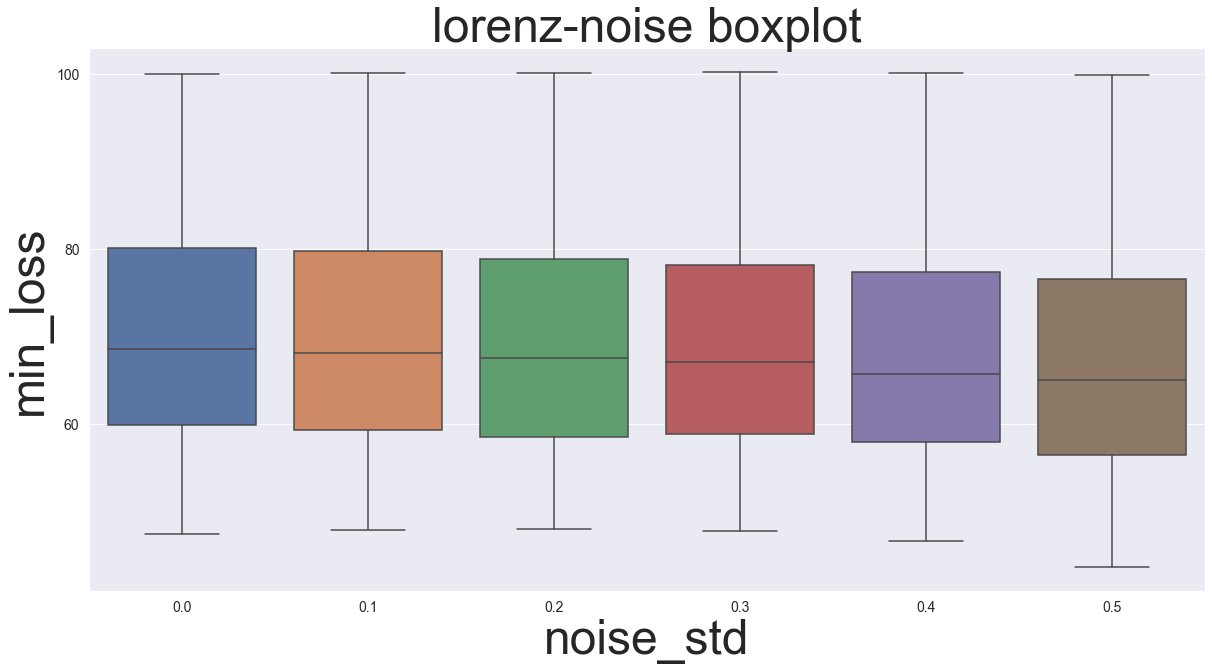

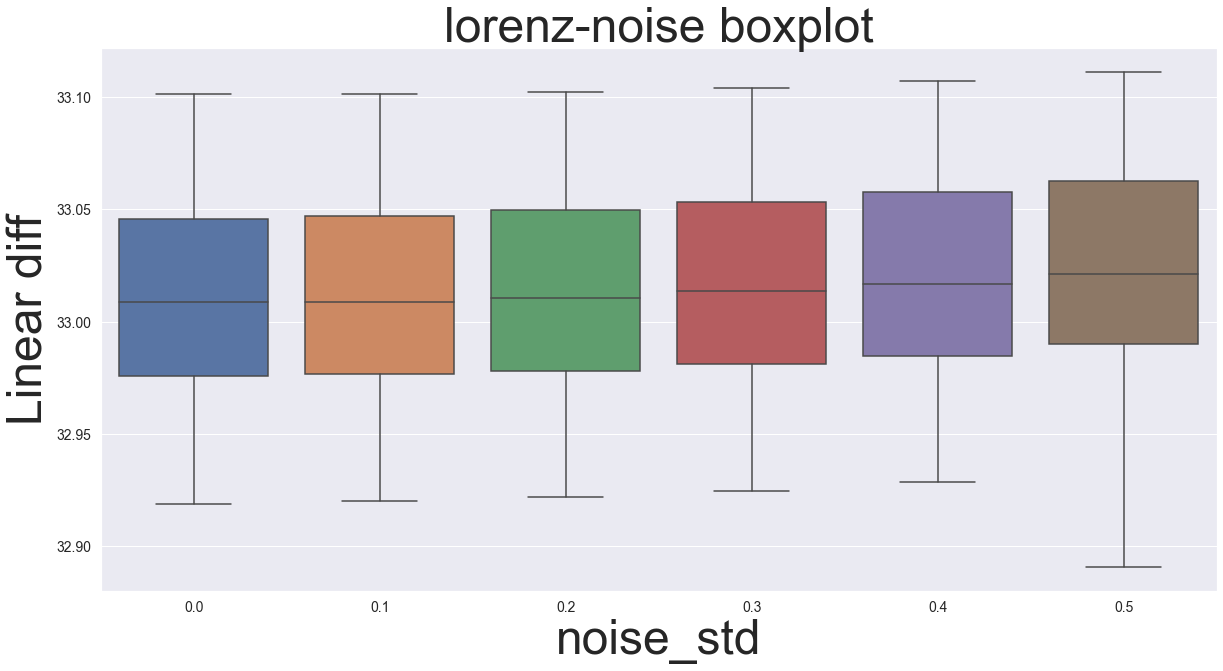

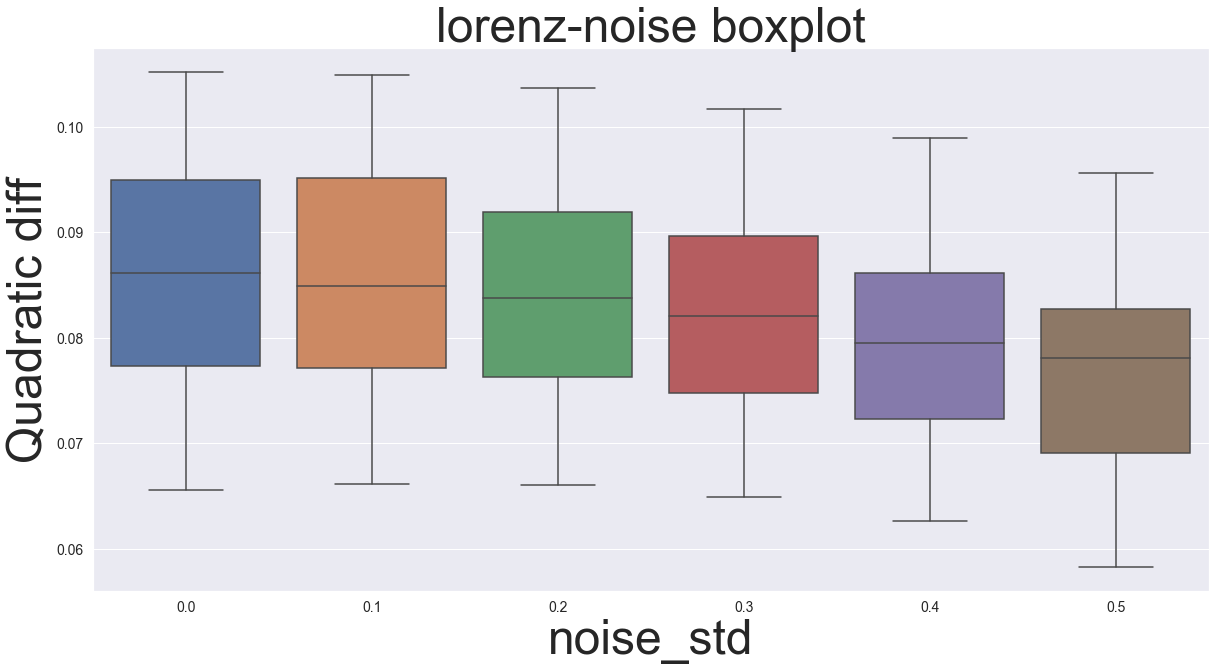

In [27]:
# boxplot with the noise
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='min_loss', 
                save_fig=False, name='lorenz_loss_noise', data_name='lorenz-noise')

boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Linear diff',  
                save_fig=False, name='lorenz_lin_noise', data_name='lorenz-noise')

boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='epoch', val_feat1=1000, 
                fixed_feat2='batch', val_feat2=10, feat_x='noise_std', feat_y='Quadratic diff', 
                save_fig=False, name='lorenz_quad_noise', data_name='lorenz-noise')

We observe that the loss and the quadratic term are decreasing as function of tht noise variance, but the linear difference is increasing as funcion of noise variance. The Lorenz attractor has a quadratic terms and not the pendulum. The Lorenz attractor has a non-null tensor for the quadratic term, then the quadratic part of the dynamical system layer converges faster to the non-zero tensor of the Lorenz terms. With the decrease of loss and the quadratic, it is possible to conclude that the model is influenced by the dominant term of the polynomial in the Taylor expansion. With the pendulum, the quadratic difference is constant as function of noise variance and increasing for the linear difference.

The deacreaing of the accuracy measurement confirm the role of the noise as regularizer.

Next, we study the accuracy measurement as function of the number of iterations by fixing the noise variance at $0.2$ and the batch size at $10.$

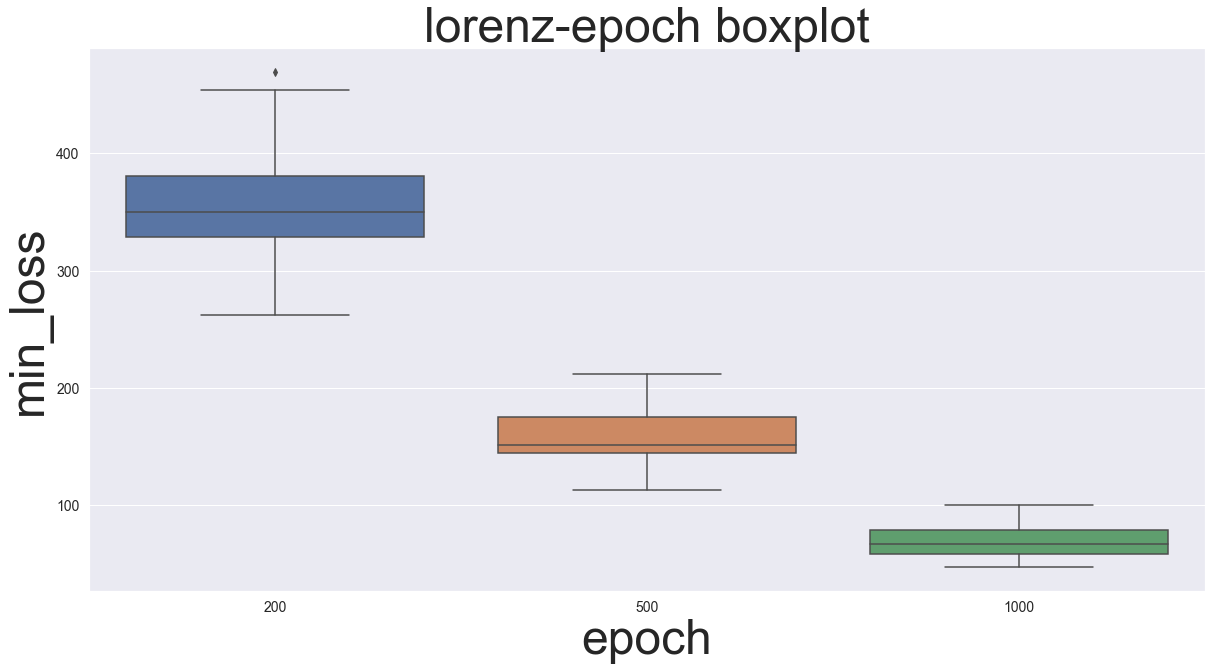

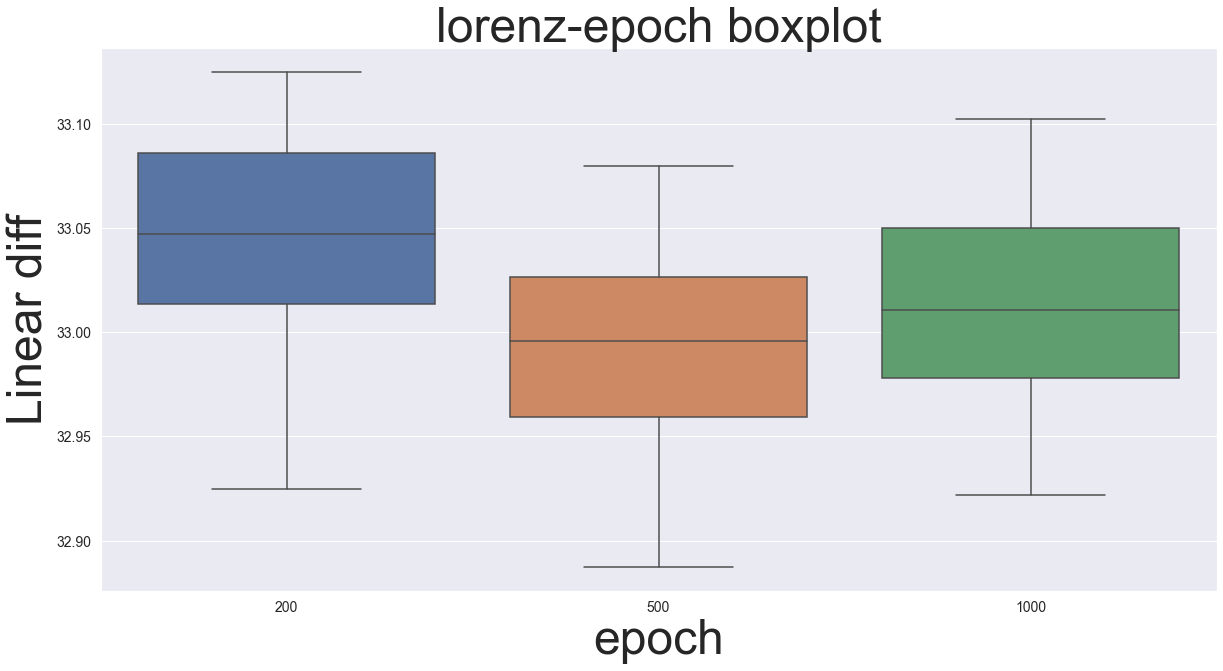

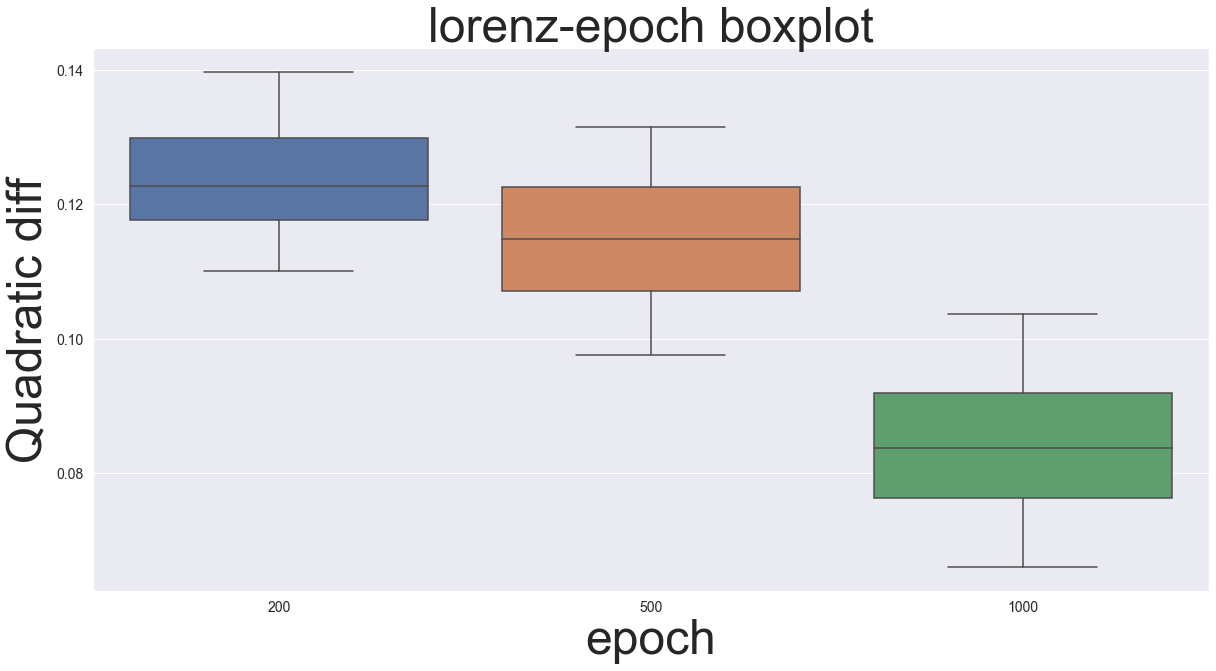

In [28]:
# boxplot with number of epoch
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='min_loss', 
                save_fig=False, name='lorenz_loss_epoch', data_name='lorenz-epoch')

boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Linear diff', 
                save_fig=False, name='lorenz_lin_epoch', data_name='lorenz-epoch')

boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='batch', val_feat2=10, feat_x='epoch', feat_y='Quadratic diff', 
                save_fig=False, name='lorenz_quad_epoch', data_name='lorenz-epoch')

The loss and the quadratic difference deacrease as function of the number of iterations which is not surprising since adding iterations increases the model accuracy, however we observe that the optimal number of iteration is $500.$ This might can be due to the fact that the linear part has difficulties to handle noise, but the model is still converging thanks to the quadratic part which is dominant in the model.

The last step is to treat the accuracy measurements as function of the batch size to conclude and see if our hypothesis is right. We fix the noise variance at $0.2$ and the number of iterations at $1000.$

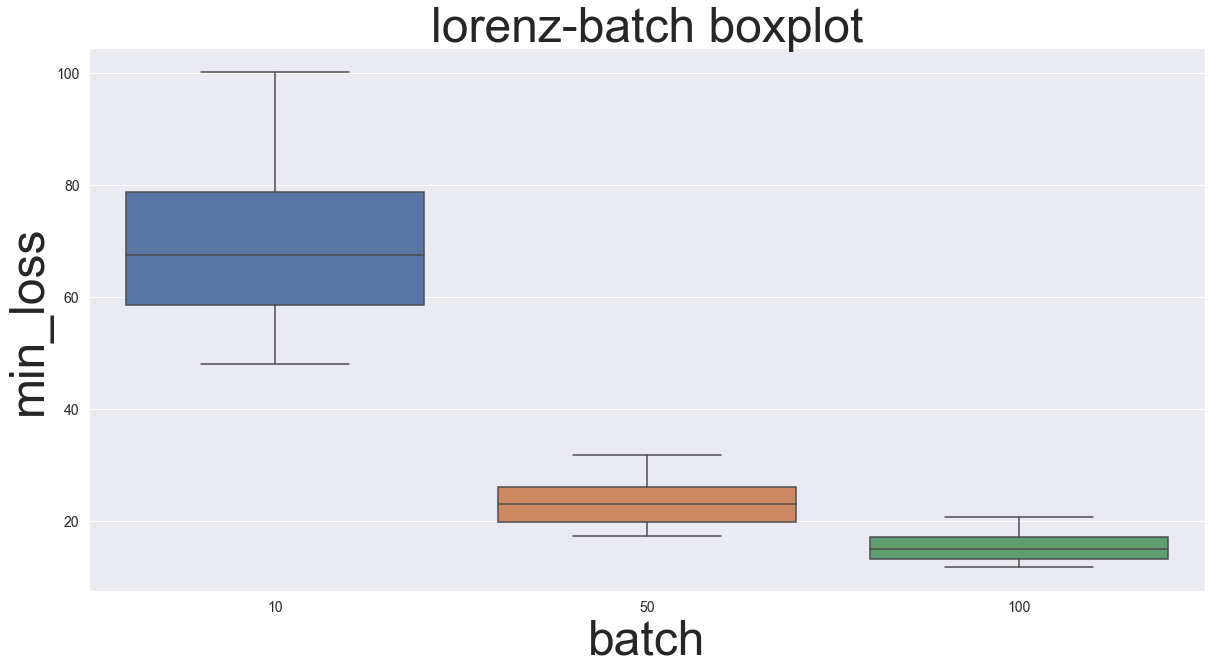

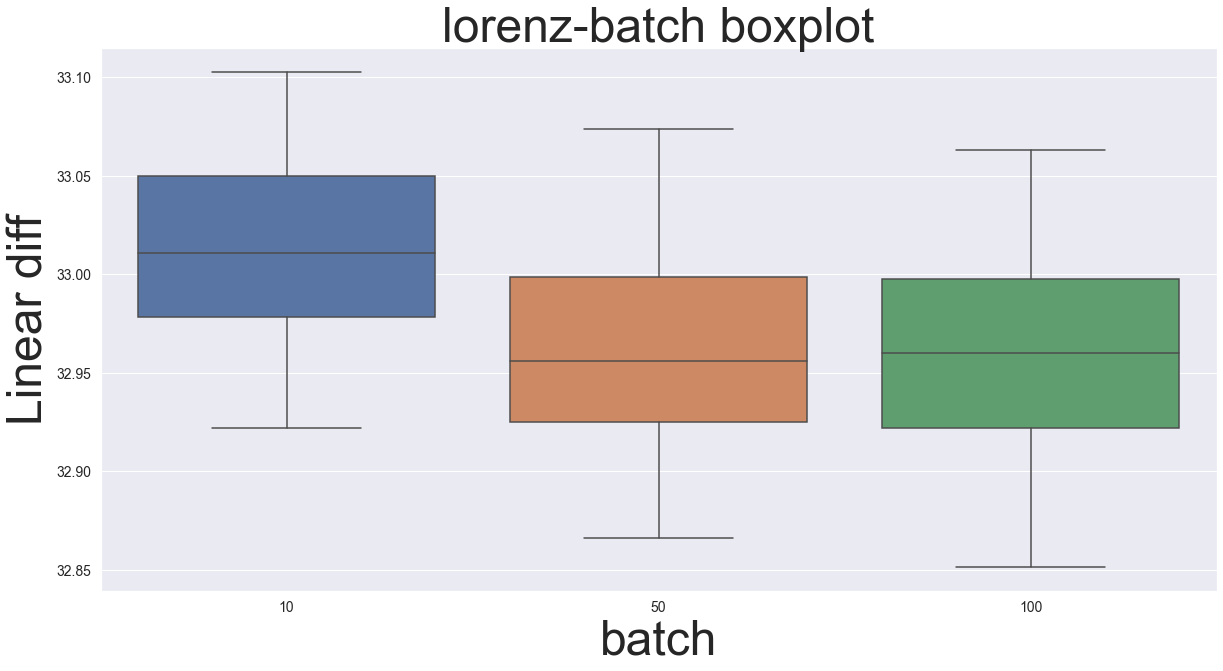

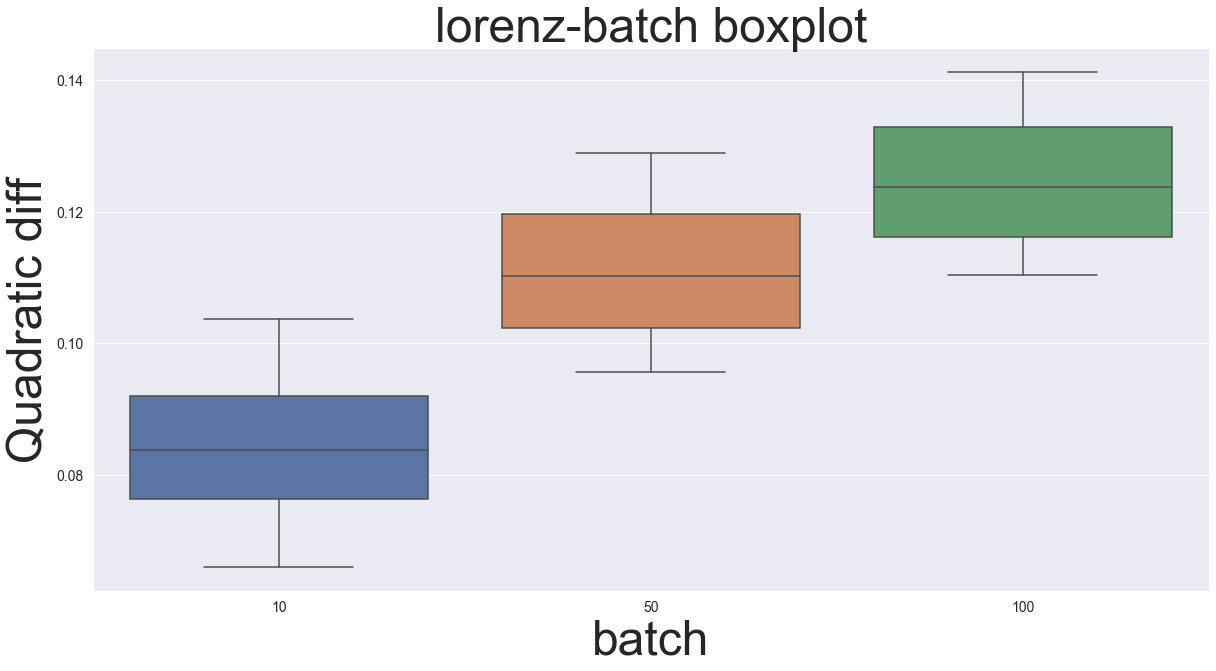

In [30]:
# boxplot with batch size
boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='min_loss', 
                save_fig=False, name='lorenz_loss_bs', data_name='lorenz-batch')


boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Linear diff', 
                save_fig=False, name='lorenz_lin_bs', data_name='lorenz-batch')

boxplot_feature(data=grid_df_lorenz_1000, fixed_feat1='noise_std', val_feat1=0.2, 
                fixed_feat2='epoch', val_feat2=1000, feat_x='batch', feat_y='Quadratic diff', 
                save_fig=False, name='lorenz_quad_bs', data_name='lorenz-batch')

The behaviour of the accuracy measurements as function of the batch size is completely different from the pendulum. We observe that the minimum loss is reach for a batch size of $100,$ the linear difference stabilize at batch size $50$ and the minimum quadratic difference is at batch size $10.$ With the batch size as feature, the dominant term (quadratic) does not influence the loss evolution. If the batch size is low, the model is not that accurate with respect to the loss value. This is due to the noise in the data and the number of iteration. If we add more value of batch size, the accuracy measurement will increase. We observe also that the minimum linear difference is at $30$ and at $0.13$ for the quadratic difference, this difference is really high. If the batch size is to small, it can contain to much noise and the model fit the noise, then small batch size can lead to overfitting.

## Conclusion
The aim of this new layer is times series forecasting. We use a dynamical system model to predict the time series, by approximating the weight of the system obtained by hte Taylor expansion. This model is able to predict existing dynamical system and is able to deal with noisy data. We observe with this model, the dominant term deterrmines the model behaviour. In our case, the quadratic term determine the model behaviour. In the noise analysis section. we observe that the model has behaviour of typical neural network layer, for example, if we add more iterations, the accuracy of the model increases. The next step is to apply this model to real data. An other to way to build this layer is to use a different basis function such as the Fourier basis. In the noise analysis, we have only considered noise with constant variance. For further works, it will be interesting to see how we can expand the model if the noise variance is a function of time and how the model can treat discontinuous time series.